<a href="https://colab.research.google.com/github/Swaghanaian/Food-Sales-Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
filename = '/content/sales_predictions.csv'
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
#To find how many rows and columns
df.info()

#Tells us we have 8523 rows and 12 columns

#The output also tells us that there are 4 columns with the dtype float64, 1 column with the dtype int64 and 7 columns with the dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Making a copy of dataframe for Machine Learning model**

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [29]:
df_ml = df.copy()

To Define features (X) and target (y). Where X is the Item Outlet Sales Column

In [30]:
target = df_ml['Item_Outlet_Sales']
X = df_ml.drop('Item_Outlet_Sales', axis=1)
y = target

To Train/test split the data. Using use the random number 42 for consistency.

In [31]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(6392, 11)

In [32]:
## Checking Datatypes 

display(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                5285 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                4580 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


None

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


**To Identify each feature as numerical, ordinal, or nominal based on the dataframe info above**.

Numerical - Item_Weight, Item_Visibility, Item_MRP, 

Ordinal - Outlet_Size, Outlet_Establishment_Year

Nominal/Categorical - Item Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Location_Type, Outlet_Type

**To Instantiate Column Selectors**

In [33]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

To Use pipelines and column transformers to impute missing values Using the mean and most frequent strategy

In [34]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

To Use One-Hot Encoder for the Nominal Features

In [35]:
# Scaler
scaler = StandardScaler()

To Use the StandardScaler to scale the Numeric Columns

In [36]:
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

**To Use the ‘mean’ strategy for numeric columns to impute missing values**

In [37]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

**To Use the ‘most frequent’ strategy for categorical columns to impute missing values**

In [38]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

**To Instantiate Column Transformer**

In [39]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f03a426f0d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f03a426f2d0>)])

**To Transform Data using transformer data on test and training datasets**

In [40]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f03a426f0d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f03a426f2d0>)])

In [41]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**To Inspect the Result and View Results**

In [42]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1595)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [43]:
# To Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [44]:
# Count the duplicates
df.duplicated().sum()

#The output shows there are no duplicates

0

In [45]:
#To identify missing values

df.isna().sum()

#Output shows 1463 values missing in Item_Weight column and 2410 values missing in Outlet_Size column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [46]:
#These missing values may be material and since I am not an expert I will use my judgment to replace missing values with the word 'Missing' in the Outlet_Size column.

#To replace missing values with the word 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [47]:
#I will also use my judgment to replace missing values in the Item_Weight column with the average of the Item_Weight column.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [48]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
# Fixing inconsistent categories of data LF to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()



Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [50]:
# Fixing inconsistent categories of data low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [51]:
# Fixing inconsistent categories of data reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [52]:
#To show summary statistics for each column, limiting to 2 decimal places

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


**To plot a univariate graph showing the Item Weight distribution**

Text(0, 0.5, 'Count')

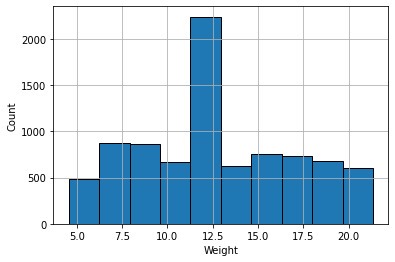

In [53]:
# To plot a histogram of the of Item Weight

import matplotlib.pyplot as plt

df['Item_Weight'].hist(edgecolor = 'black');
plt.xlabel('Weight');
plt.ylabel('Count')

The histogram tells us that the Items that have a weight of 12.5 are the highest percentage of the total count

**To plot 2 different multivariate graphs showing the relationship between some of the columns(Outlet Type, Outlet Sales & MRP)**

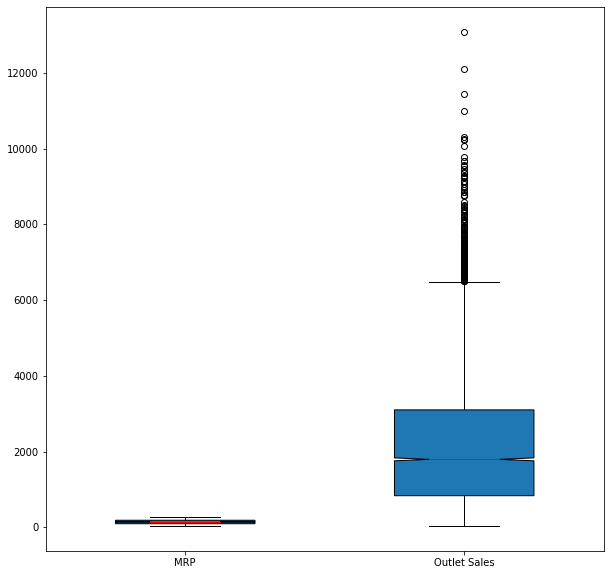

In [54]:
from IPython.core.pylabtools import figsize
mrp= df['Item_MRP']
sales = df['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10) )
boxplots = axes.boxplot([mrp, sales], notch= True,labels = ['MRP','Outlet Sales'],
             widths = .5,
             patch_artist = True,
             medianprops = dict(linestyle = '-',linewidth = 1, color = 'red'),
             boxprops = dict(linestyle = '--', linewidth = 1, color = 'black'));



This boxplot shows that the different outlet types buy products at a very low cost and sell for High margins

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

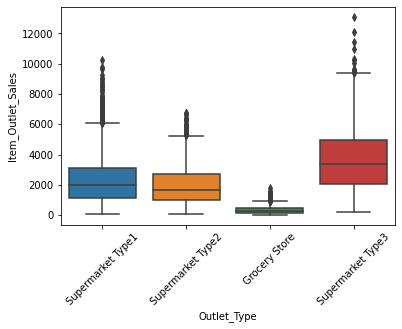

In [55]:
#To plot a boxplot graph of Outlet Type and Item Outlet Sales
import seaborn as sns
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 45)

The boxplot graph of Outlet Type and Item Outlet Sales shows that each of the Supermarket Outlet Types have greater sales than the Grocery Store.

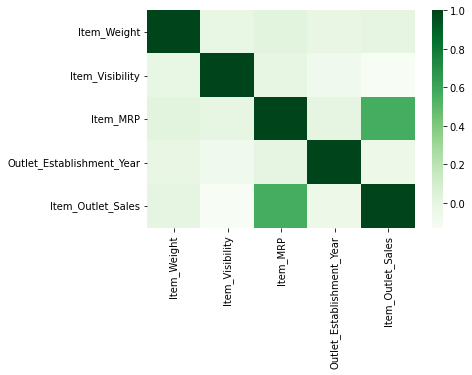

In [56]:
#To plot a heatmap correlation between features.
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens')

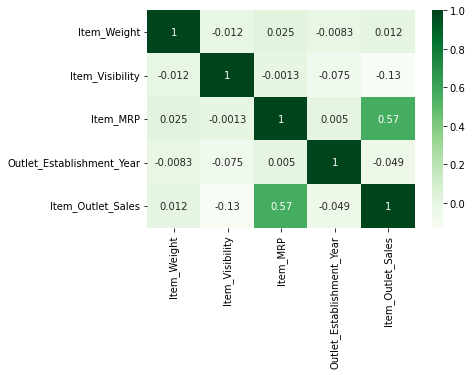

In [57]:
#Example 2 for Heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True)

This heat map tells us that there is a moderate correlation between Item Outlet Sales and Item MRP

**To create two more visualizations to show the distribution of Outlet Sales per Outlet Type**

In [58]:
#Just creating a variable to summarize the visualization I am creating
Sales_per_outlet_type = df.groupby(['Outlet_Type'])['Item_Outlet_Sales']

In [59]:
Sales_per_outlet_type.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## **The first visualization will be a line plot using Matplotlib**

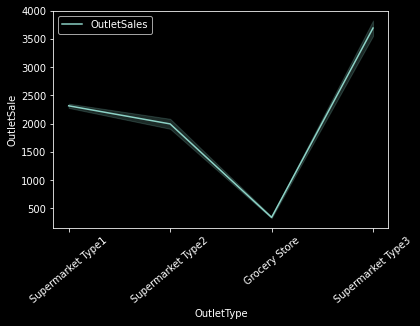

In [61]:
from traitlets.traitlets import Type
plt.style.use('dark_background')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales')
plt.xlabel('OutletType')
plt.ylabel('OutletSale')
plt.xticks(rotation=40)
plt.legend()

The visualization above shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales.

## **The second visualization will be a bar graph using Matplotlib**

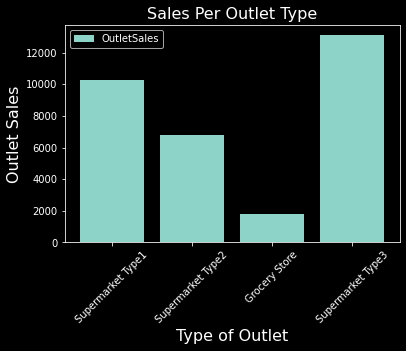

In [62]:
plt.bar('Outlet_Type', 'Item_Outlet_Sales',data=df, label='OutletSales')
plt.style.use('seaborn-pastel')
plt.xlabel('Type of Outlet', fontsize = 16)
plt.ylabel('Outlet Sales', fontsize = 16)
plt.title('Sales Per Outlet Type', fontsize = 16)
plt.xticks(rotation=45)
plt.legend()

This visualization above also shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales. In my opinion, this graph is easier to read and understand. Tried out the pastel chart style to see how it is.